# Step 1: Identify the 42 Core Grid Cells

**Goal:** To find the exact coordinates of the grid cells that have complete data for the entire period from 1982 to 2016.

**Methodology:**
1.  Load the clean CSV dataset we created.
2.  Exclude the year 1981.
3.  Count the number of years each grid cell appears in the data.
4.  Keep only the cells that appear in all 35 years (from 1982 to 2016).
5.  Save the coordinates of these "core" cells to a new file.
6.  Visually confirm the result by plotting only these core cells on a map.

--- Found 42 grid cells with complete data from 1982-2016 ---
Saved the coordinates of the core cells to: ../data/analysis_ready/n_italy_core_42_cells.csv

Preview of the core cells coordinates:
     lat    lon
0  43.75  11.75
1  43.75  12.25
2  44.25   6.75
3  44.25   7.25
4  44.25   7.75

--- Visualizing the {len(core_cells)} Core Grid Cells ---


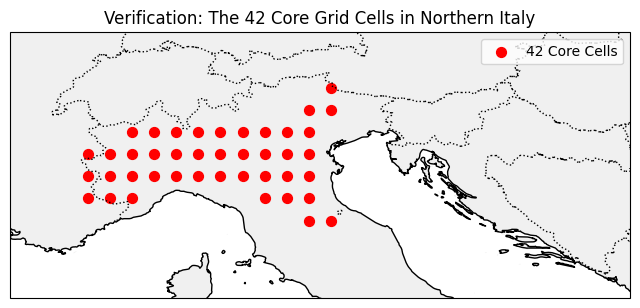

In [1]:
# Cell 1: Find, Save, and Visualize the 42 Core Grid Cells
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

# --- 1. Load the dataset ---
file_path = '../data/analysis_ready/n_italy_maize_gridcell_temp_data.csv'
df = pd.read_csv(file_path)

# --- 2. Exclude 1981 data ---
df_filtered = df[df['year'] != 1981].copy()

# --- 3. Find the cells present in ALL 35 years (1982-2016) ---
# Group by each grid cell and count how many years of data it has
cell_counts = df_filtered.groupby(['lat', 'lon']).size()

# The total number of years we are considering
total_years = 1982 - 2016 + 1

# Keep only the cells that have a count equal to the total number of years
core_cells = cell_counts[cell_counts == 35].reset_index()[['lat', 'lon']]

print(f"--- Found {len(core_cells)} grid cells with complete data from 1982-2016 ---")

# --- 4. Save the coordinates of these core cells ---
output_dir = '../data/analysis_ready/'
os.makedirs(output_dir, exist_ok=True)
core_cells_path = os.path.join(output_dir, 'n_italy_core_42_cells.csv')
core_cells.to_csv(core_cells_path, index=False)

print(f"Saved the coordinates of the core cells to: {core_cells_path}")
print("\nPreview of the core cells coordinates:")
print(core_cells.head().to_string())

# --- 5. VISUAL VERIFICATION ---
print("\n--- Visualizing the {len(core_cells)} Core Grid Cells ---")
plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([5, 19, 42, 48], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='#f0f0f0')
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Use a scatter plot to show the exact location of each of the 42 core cells
ax.scatter(x=core_cells['lon'], y=core_cells['lat'],
           transform=ccrs.PlateCarree(),
           color='red', s=50,  # s is size
           label=f'{len(core_cells)} Core Cells')

plt.title('Verification: The 42 Core Grid Cells in Northern Italy')
ax.legend()
plt.show()